In [2]:
import os 
import pandas as pd 
import numpy as np 
import re 
import json 
import copy
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from datetime import datetime
warnings.filterwarnings("ignore")

df=pd.read_json("scout_car.json",lines=True)
df.columns=[i.replace(" ","_").lower() for i in df.columns]
urls=df.iloc[:,0]
df=df.iloc[:,1:]
df.head()


c:\Users\turan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kw,hp,...,description,emission_label,gears,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,...,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,...,[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,...,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,...,"[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,NaN,66 kW,...,"[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.iloc[:,12:24].head()

,next_inspection,inspection_new,warranty,full_service,non-smoking_vehicle,null,make,model,offer_number,first_registration,body_color,paint_type
0,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n]
1,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN
2,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n]
3,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n]
4,NaN,"[\nYes\n, \n109 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nC1626\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n]


In [5]:
df.iloc[:,24:].head()

,body_color_original,upholstery,body,nr._of_doors,nr._of_seats,model_code,gearing_type,displacement,cylinders,weight,...,description,emission_label,gears,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from
0,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",...,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",...,[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,...,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",...,"[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,...,"[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns=[i.replace(" ","_") for i in df.columns]#strip white spaces from the colum names
df.columns=[i.strip("\n").replace(".","").replace("&","") for i in df.columns]

In [7]:
df.isna().sum()

make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kw                               15919
hp                                   0
type                                 2
previous_owners                   6640
next_inspection                  12384
inspection_new                   11987
warranty                          5420
full_service                      7704
non-smoking_vehicle               8742
null                                 0
make                                 0
model                                0
offer_number                      3175
first_registration                1597
body_color                         597
paint_type                        5772
body_color_original               3759
upholstery               

In [8]:
df.drop("description",1,inplace=True)#dropping the German description

In [9]:
na_above_5000=[i for i in df.columns if df[i].isna().sum()>5000]#leaving the features with more than 5000 NAs aside

df=df[[i for i in df.columns if df[i].isna().sum()<=5000]]#working with features with less than 5000 NAs

In [10]:
class NewData:
    """ 
    This class combine the cleaned features of the dataset into a dataframe
    """
    def __init__(self):
        self.data_list=[]
        self.data_frame=None
        self.name_of_list=[]

    def add(self,data,name):
        self.name=name
        self.data=data
        if type(self.data)==pd.core.series.Series:
            self.data=self.data.to_list()
        
        if self.data not in self.data_list:
            # self.data=pd.Series(self.data)
            self.data_list.append(self.data)
            
            
            if len(self.data)!=len(self.data_list[0]):
                    raise ValueError("check the data length") 
                          
            self.data_frame=pd.concat([pd.Series(i) for i in self.data_list],1)    
       

        self.column_names()
        self.data_frame.columns=self.name_of_list
   
    def column_names(self):
        if self.name not in self.name_of_list:
            self.name_of_list.append(self.name) 
            return self
    def remove_name(self,name_to_remove):
        self.name_of_list.remove(name_to_remove)

    def remove_data_list(self,data_list_to_remove):
        self.data_list.remove(data_list_to_remove)    


    def remove_data_frame(self,data_frame_to_remove):   
        self.data_frame.drop(data_frame_to_remove,1,inplace=True) 




new_data=NewData()


In [205]:
def unpack_numeric_list(data,*args):
    """unpack numeric columns"""
    unpacked_numeric_list=[]
    for i in data:
        try:
            if len(i)==1:
                a=([i[0].replace(j,"").strip("\n") for j in args])
                unpacked_numeric_list.append(int(a[1]))
            else:
                b=([i.strip(j).replace("\n","").replace(",","") for j in args])
                unpacked_numeric_list.append(int(b[0]))    
        except:
            # print(i) 
            unpacked_numeric_list.append(None)


    return unpacked_numeric_list        

co2_emission=unpack_numeric_list(df.co2_emission,"\n"," g CO2/km (comb)")

new_data.add(co2_emission,"co2_emission")      

In [1]:
def clean_numeric_data_new(data,*args):
    data_list=[]
    for i in data:
        try:
            
            a=i[0].strip(args).replace("\n","").replace(",","")
            data_list.append((a))
        except:
            data_list.append(None)   
    # print(strip)        
    return data_list   


In [ ]:
def clean_numeric_data(data,to_clean):
    data_list=[]
    for i in data:
        try:
            data_list.append(int(i.strip(to_clean).replace(",","")))
        except:
            data_list.append(None)   
    return data_list        
     

In [ ]:
df["make"]= [i.split()[0] for i in df.make_model]
df["model"]=[i.split()[1] for i in df.make_model]
df.drop("make_model",1,inplace=True)

In [12]:
new_data.add(df.make,"make")
new_data.add(df.model,"model")


In [13]:
def clean_numeric_data(data,to_clean):
    data_list=[]
    for i in data:
        try:
            data_list.append(int(i.strip(to_clean).replace(",","")))
        except:
            data_list.append(None)   
    return data_list        

In [14]:
df.km=clean_numeric_data(df.km, " km")

In [15]:
df.hp=clean_numeric_data(df.hp," kW")

In [16]:

new_data.add(df.km,"km")
new_data.add(df.hp,"hp")
new_data.data_frame

,make,model,km,hp
0,Audi,A1,56013.0,66.0
1,Audi,A1,80000.0,141.0
2,Audi,A1,83450.0,85.0
3,Audi,A1,73000.0,66.0
4,Audi,A1,16200.0,66.0
...,...,...,...,...
15914,Renault,Espace,NaN,147.0
15915,Renault,Espace,9900.0,165.0
15916,Renault,Espace,15.0,146.0
15917,Renault,Espace,10.0,147.0


In [17]:

def empty_columns(column):
    """This function counts the number of cells with empty lists ([])"""
    count=0
    for i in column:
        if i==[]: 
            count+=1

    return count        

empty_columns(df.null) 

15919

In [18]:
[(i,empty_columns(df[i])) for i in df.columns if empty_columns(df[i])>100]

[('null', 15919)]

In [19]:
df.drop("null",1,inplace=True)#null contains only empty lists

In [20]:
df.head()

,short_description,body_type,price,vat,km,registration,hp,type,make,model,...,displacement,fuel,consumption,co2_emission,emission_class,comfort__convenience,entertainment__media,extras,safety__security,gears
0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,01/2016,66.0,"[, Used, , Diesel (Particulate Filter)]",Audi,A1,...,"[\n1,422 cc\n]","[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN
1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,03/2017,141.0,"[, Used, , Gasoline]",Audi,A1,...,"[\n1,798 cc\n]","[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n7\n]
2,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,02/2016,85.0,"[, Used, , Diesel (Particulate Filter)]",Audi,A1,...,"[\n1,598 cc\n]","[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",NaN
3,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,08/2016,66.0,"[, Used, , Diesel (Particulate Filter)]",Audi,A1,...,"[\n1,422 cc\n]","[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",[\n6\n]
4,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.0,05/2016,66.0,"[, Used, , Diesel (Particulate Filter)]",Audi,A1,...,"[\n1,422 cc\n]","[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN


In [21]:
#unpack and clean 
df["transmission"]=[i[1] for i in df.gearing_type]
new_data.add(df.transmission,"transmission")
new_data.data_frame


,make,model,km,hp,transmission
0,Audi,A1,56013.0,66.0,Automatic
1,Audi,A1,80000.0,141.0,Automatic
2,Audi,A1,83450.0,85.0,Automatic
3,Audi,A1,73000.0,66.0,Automatic
4,Audi,A1,16200.0,66.0,Automatic
...,...,...,...,...,...
15914,Renault,Espace,NaN,147.0,Automatic
15915,Renault,Espace,9900.0,165.0,Automatic
15916,Renault,Espace,15.0,146.0,Automatic
15917,Renault,Espace,10.0,147.0,Automatic


In [22]:
engine_size=[]
for i in df.short_description:
   if i:
    engine_cc=re.findall("[1-9][.][0-9]",i)
    # print(engine_size)
    if  len(engine_cc)>0:
        engine_size.append(float(engine_cc[0]))
    else:
        engine_size.append(None)  
   else:
    engine_size.append(None) 


df["engine_size"]=engine_size

new_data.add(df.engine_size,"engine_size")


In [23]:
len(engine_size)

15919

In [24]:
[i.split() if i else i for i in df.short_description][:5]

[['Sportback', '1.4', 'TDI', 'S-tronic', 'Xenon', 'Navi', 'Klima'],
 ['1.8', 'TFSI', 'sport'],
 ['Sportback', '1.6', 'TDI', 'S', 'tronic', 'Einparkhilfe', 'plus+music'],
 ['1.4', 'TDi', 'Design', 'S', 'tronic'],
 ['Sportback', '1.4', 'TDI', 'S-Tronic', 'S-Line', 'Ext.', 'admired,', 'Xe']]

In [25]:
#unpacking sportback cars
sport_back=[]
for i in df.short_description:
    if i and len(i)!=0:
        sportback=re.findall("Sportback|sport|SPORTBACK",i)
        if sportback:
            sport_back.append(1)
           
        else:
            sport_back.append(0)
           

    else:
        sport_back.append(0)  
                 

df["sport_back"]=sport_back
new_data.add(df.sport_back,"sport_back")


In [26]:
def unpack_list(data):
    """Urpack the columns that contain data in list at row level"""
    unpacked_list=[]
    for i in data:
        if i and type(i)!=float:
            unpacked_list.append(i[0].strip())
        else:
            unpacked_list.append(None)

    return unpacked_list        

In [27]:
df["number_offer"]= unpack_list(df.offer_number)

In [28]:
#unpacking offer_number
number_offer=[]
for i in df.offer_number:
    if i and type(i)!=float:
        number_offer.append(i[0].strip())
    else:
        number_offer.append(None) 

df["number_offer"]=number_offer   
new_data.add(df.number_offer,"number_offer")

In [29]:
#unpacking displacmenet
cylinder=[]
for i in df.displacement:
    try:
        cylinder.append(int(i[0].strip("\n1,").strip(" cc")))
        
    except:
        cylinder.append(None) 




df["cylinder"]=cylinder
new_data.add(df.cylinder,"cylinder")

In [30]:
new_data.data_frame

,make,model,km,hp,transmission,engine_size,sport_back,number_offer,cylinder
0,Audi,A1,56013.0,66.0,Automatic,1.4,1,LR-062483,422.0
1,Audi,A1,80000.0,141.0,Automatic,1.8,1,None,798.0
2,Audi,A1,83450.0,85.0,Automatic,1.6,1,AM-95365,598.0
3,Audi,A1,73000.0,66.0,Automatic,1.4,0,None,422.0
4,Audi,A1,16200.0,66.0,Automatic,1.4,1,C1626,422.0
...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,NaN,147.0,Automatic,NaN,0,10988301,997.0
15915,Renault,Espace,9900.0,165.0,Automatic,NaN,0,507370_3223,798.0
15916,Renault,Espace,15.0,146.0,Automatic,NaN,0,Espace16,997.0
15917,Renault,Espace,10.0,147.0,Automatic,NaN,0,2691331,997.0


In [31]:
df.iloc[:,:13].head()

,short_description,body_type,price,vat,km,registration,hp,type,make,model,offer_number,first_registration,body_color
0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,01/2016,66.0,"[, Used, , Diesel (Particulate Filter)]",Audi,A1,[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]"
1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,03/2017,141.0,"[, Used, , Gasoline]",Audi,A1,NaN,"[\n, 2017, \n]","[\n, Red, \n]"
2,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,02/2016,85.0,"[, Used, , Diesel (Particulate Filter)]",Audi,A1,[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]"
3,1.4 TDi Design S tronic,Sedans,14500,None,73000.0,08/2016,66.0,"[, Used, , Diesel (Particulate Filter)]",Audi,A1,NaN,"[\n, 2016, \n]","[\n, Brown, \n]"
4,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.0,05/2016,66.0,"[, Used, , Diesel (Particulate Filter)]",Audi,A1,[\nC1626\n],"[\n, 2016, \n]","[\n, Black, \n]"


In [32]:
df.iloc[:,13:25].head()

,body_color_original,upholstery,body,nr_of_doors,nr_of_seats,gearing_type,displacement,fuel,consumption,co2_emission,emission_class,comfort__convenience
0,[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]","[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ..."
1,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]","[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ..."
2,[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]","[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ..."
3,NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]","[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E..."
4,[\nMythosschwarz Metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]","[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ..."


In [33]:
df.iloc[:,25:].head()

,entertainment__media,extras,safety__security,gears,transmission,engine_size,sport_back,number_offer,cylinder
0,"[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,Automatic,1.4,1,LR-062483,422.0
1,"[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n7\n],Automatic,1.8,1,None,798.0
2,"[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",NaN,Automatic,1.6,1,AM-95365,598.0
3,"[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",[\n6\n],Automatic,1.4,0,None,422.0
4,"[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",NaN,Automatic,1.4,1,C1626,422.0


In [34]:
gears=[]
for i in df.gears:
    if i and type(i)!=float:
        gears.append(i[0].strip())
    else:
        gears.append(None)

In [35]:
gears=unpack_list(df.gears)#unpacking the gears

new_data.add(gears,"gears")
new_data.data_frame

,make,model,km,hp,transmission,engine_size,sport_back,number_offer,cylinder,gears
0,Audi,A1,56013.0,66.0,Automatic,1.4,1,LR-062483,422.0,None
1,Audi,A1,80000.0,141.0,Automatic,1.8,1,None,798.0,7
2,Audi,A1,83450.0,85.0,Automatic,1.6,1,AM-95365,598.0,None
3,Audi,A1,73000.0,66.0,Automatic,1.4,0,None,422.0,6
4,Audi,A1,16200.0,66.0,Automatic,1.4,1,C1626,422.0,None
...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,NaN,147.0,Automatic,NaN,0,10988301,997.0,6
15915,Renault,Espace,9900.0,165.0,Automatic,NaN,0,507370_3223,798.0,7
15916,Renault,Espace,15.0,146.0,Automatic,NaN,0,Espace16,997.0,6
15917,Renault,Espace,10.0,147.0,Automatic,NaN,0,2691331,997.0,6


In [36]:
unique_safety_features=[]
safety_features=[]
for i in df.safety__security:
    if i not in unique_safety_features:
        unique_safety_features.append(i)
        

    if type(i)!=float:
        for feature in i:
            safety_features.append(feature)
    else:
        safety_features.append(None)        

   
len(safety_features)     

192074

In [37]:
safety_features[:5]

['ABS',
 'Central door lock',
 'Daytime running lights',
 'Driver-side airbag',
 'Electronic stability control']

In [38]:
len(safety_features) 

192074

In [39]:
len(unique_safety_features)

4444

In [40]:
sss={}

In [41]:
df.safety__security.isna().sum()

982

In [42]:
[i for i in df.safety__security][:5]

[['ABS',
  'Central door lock',
  'Daytime running lights',
  'Driver-side airbag',
  'Electronic stability control',
  'Fog lights',
  'Immobilizer',
  'Isofix',
  'Passenger-side airbag',
  'Power steering',
  'Side airbag',
  'Tire pressure monitoring system',
  'Traction control',
  'Xenon headlights'],
 ['ABS',
  'Central door lock',
  'Central door lock with remote control',
  'Daytime running lights',
  'Driver-side airbag',
  'Electronic stability control',
  'Head airbag',
  'Immobilizer',
  'Isofix',
  'Passenger-side airbag',
  'Power steering',
  'Side airbag',
  'Tire pressure monitoring system',
  'Traction control',
  'Xenon headlights'],
 ['ABS',
  'Central door lock',
  'Daytime running lights',
  'Driver-side airbag',
  'Electronic stability control',
  'Immobilizer',
  'Isofix',
  'Passenger-side airbag',
  'Power steering',
  'Side airbag',
  'Tire pressure monitoring system',
  'Traction control'],
 ['ABS',
  'Alarm system',
  'Central door lock with remote control

In [43]:
unique_fuel=[]
for i in df.fuel:
    unique_fuel.append(i[1])

In [44]:
fuel_type=[]
for i in df.fuel:
    if  re.findall("Benzine|Gasoline|Super",i[1]):
        fuel_type.append("Benzine")
    elif  re.findall("LPG",i[1]):    
        fuel_type.append("LPG")
    elif re.findall("Diesel",i[1]):
        fuel_type.append("Diesel")
    elif re.findall("CNG",i[1]):
        fuel_type.append("CNG")
    elif re.findall("Electric",i[1]):
        fuel_type.append("Electric")
    else:
        fuel_type.append("Others")       
             

# new_data.add(fuel_type,"fuel_type")


In [45]:
new_data.add(fuel_type,"fuel_type")

In [46]:
np.unique(fuel_type)

array(['Benzine', 'CNG', 'Diesel', 'Electric', 'LPG', 'Others'],
      dtype='<U8')

In [47]:
from collections import Counter
Counter(fuel_type)

Counter({'Diesel': 7299,
         'Benzine': 8549,
         'Others': 8,
         'CNG': 36,
         'LPG': 26,
         'Electric': 1})

In [51]:
new_data.data_frame

,make,model,km,hp,transmission,engine_size,sport_back,number_offer,cylinder,gears,fuel_type,co2_emission
0,Audi,A1,56013.0,66.0,Automatic,1.4,1,LR-062483,422.0,None,Diesel,99.0
1,Audi,A1,80000.0,141.0,Automatic,1.8,1,None,798.0,7,Benzine,129.0
2,Audi,A1,83450.0,85.0,Automatic,1.6,1,AM-95365,598.0,None,Diesel,99.0
3,Audi,A1,73000.0,66.0,Automatic,1.4,0,None,422.0,6,Diesel,99.0
4,Audi,A1,16200.0,66.0,Automatic,1.4,1,C1626,422.0,None,Diesel,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,NaN,147.0,Automatic,NaN,0,10988301,997.0,6,Diesel,139.0
15915,Renault,Espace,9900.0,165.0,Automatic,NaN,0,507370_3223,798.0,7,Benzine,168.0
15916,Renault,Espace,15.0,146.0,Automatic,NaN,0,Espace16,997.0,6,Diesel,139.0
15917,Renault,Espace,10.0,147.0,Automatic,NaN,0,2691331,997.0,6,Diesel,139.0


In [52]:
new_data.add(df.body_type,"body_typ")

In [53]:
new_data.add(df.price,"price")

In [54]:
number_of_doors=unpack_numeric_list(df.nr_of_doors,"\n","\n")
new_data.add(number_of_doors,"number_of_doors")

In [55]:
new_data.add(df.vat,"vat")

In [56]:
number_of_seats=unpack_numeric_list(df.nr_of_seats,"\n","\n")
new_data.add(number_of_seats,"number_of_seats")

In [57]:
emission_class=[]
for i in df.emission_class:
    try:
        # if [] in i:
        #     emission_class.append(None)
        emission_class.append(i[0].strip("\n "))

    except:
        emission_class.append(None)    

new_data.add(emission_class,"emission_class")        

In [58]:
len(emission_class),df.emission_class.shape

(15919, (15919,))

In [59]:
consumption_combined=[]
for i in df.consumption:
    try:
        consumption_combined.append(float(i[0][0].split()[0]))
    except:
        consumption_combined.append(None)

new_data.add(consumption_combined,"consumption_combined")        

In [60]:
consumption_city=[]
for i in df.consumption:
    try:
        consumption_city.append(float(i[1][0].split()[0]))
    except:
        consumption_city.append(None)


new_data.add(consumption_city,"consumption_city")        

In [61]:
registration=[]
for i in df.registration:
    try:
       dt=pd.to_datetime(i)
       registration.append(dt)
    except:
        registration.append(None)    

new_data.add(registration,"registration")        

In [62]:
"""
Since all cars have similar safety features, and these features are many
I counted the number of features as a measurement of safety of a car.

"""
safety_features=[]
for i in df.safety__security:
    try:
        safety_features.append(len(i))

    except:
        safety_features.append(None)
new_data.add(safety_features,"safety_features")

In [63]:
upholstery_color=[]
upholstery=[]
for i in df.upholstery:
    try:
        feat=i[0].strip("\n").split(",")
        upholstery_color.append(feat[1])
        upholstery.append(feat[0])  

    except:
        upholstery.append(None)
        upholstery_color.append(None)  

new_data.add(upholstery_color,"upholstery_color")
new_data.add(upholstery,"upholstery")        

In [64]:
"""
Since all cars have similar safety features, and these features are many
I counted the number of features as a measurement of safety of a car.

"""
extras=[]
for i in df.extras:
    try:
        extras.append(len(i))

    except:
        extras.append(None)    

new_data.add(extras,"extras")        

In [65]:
df.entertainment__media.isna().sum()

1374

In [66]:
"""
Since all cars have similar safety features, and these features are many
I counted the number of features as a measurement of safety of a car.

"""
entertainment=[]
for i in df.entertainment__media:
    try:
        entertainment.append(len(i))

    except:
        entertainment.append(None)  

new_data.add(entertainment,"entertainment")        

In [67]:

body_original_color=[]
for i in df.body_color_original:
    try:
        body_original_color.append(i[0].strip("\n").capitalize())
      

    except:
        body_original_color.append(None)  

new_data.add(body_original_color,"body_original_color")   

In [68]:
"""
Since all cars have similar safety features, and these features are many
I counted the number of features as a measurement of safety of a car.

"""
comfort_convenience=[]
for i in df.comfort__convenience:
    try:
        comfort_convenience.append(len(i))
    except:
        comfort_convenience.append(None)  


new_data.add(comfort_convenience,"comfort_convenience")        

In [69]:

data =copy.deepcopy( new_data.data_frame)

data.groupby("make")["km"].mean().to_dict()["Renault"]

31934.262573964497

In [70]:
#filling the missing km values with relevant car brand average
for car in data.make.unique():
    data.km.fillna(data.groupby("make")["km"].mean().to_dict()[car],inplace=True)

In [71]:
data

,make,model,km,hp,transmission,engine_size,sport_back,number_offer,cylinder,gears,...,consumption_combined,consumption_city,registration,safety_features,upholstery_color,upholstery,extras,entertainment,body_original_color,comfort_convenience
0,Audi,A1,56013.000000,66.0,Automatic,1.4,1,LR-062483,422.0,None,...,3.8,4.3,2016-01-01,14.0,Black,Cloth,3.0,4.0,Mythosschwarz,16.0
1,Audi,A1,80000.000000,141.0,Automatic,1.8,1,None,798.0,7,...,5.6,7.1,2017-03-01,15.0,Grey,Cloth,4.0,5.0,None,9.0
2,Audi,A1,83450.000000,85.0,Automatic,1.6,1,AM-95365,598.0,None,...,3.8,4.4,2016-02-01,12.0,Black,Cloth,2.0,2.0,Mythosschwarz metallic,13.0
3,Audi,A1,73000.000000,66.0,Automatic,1.4,0,None,422.0,6,...,3.8,4.3,2016-08-01,14.0,None,None,3.0,8.0,None,16.0
4,Audi,A1,16200.000000,66.0,Automatic,1.4,1,C1626,422.0,None,...,4.1,4.6,2016-05-01,13.0,Black,Cloth,4.0,7.0,Mythosschwarz metallic,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault,Espace,33005.972719,147.0,Automatic,NaN,0,10988301,997.0,6,...,5.3,6.2,NaT,19.0,None,None,2.0,6.0,Grigio scuro,20.0
15915,Renault,Espace,9900.000000,165.0,Automatic,NaN,0,507370_3223,798.0,7,...,NaN,7.0,2019-01-01,19.0,None,None,3.0,5.0,Stahl-grau metallic,23.0
15916,Renault,Espace,15.000000,146.0,Automatic,NaN,0,Espace16,997.0,6,...,5.3,6.2,2019-03-01,18.0,Black,Full leather,1.0,4.0,Arktis-weiß,24.0
15917,Renault,Espace,10.000000,147.0,Automatic,NaN,0,2691331,997.0,6,...,5.3,6.2,2019-06-01,12.0,None,None,2.0,4.0,Grigio,10.0


In [72]:
df.fuel.str.join("").str.strip("\n")


0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: fuel, Length: 15919, dtype: object

In [73]:
data.isna().sum()

make                       0
model                      0
km                         0
hp                        88
transmission               0
engine_size             5124
sport_back                 0
number_offer            3175
cylinder                 601
gears                   4712
fuel_type                  0
co2_emission            2443
body_typ                  60
price                      0
number_of_doors          212
vat                     4513
number_of_seats          977
emission_class          3628
consumption_combined    2883
consumption_city        2422
registration            1597
safety_features          982
upholstery_color        5861
upholstery              5861
extras                  2962
entertainment           1374
body_original_color     3759
comfort_convenience      920
dtype: int64

In [74]:
data.hp.fillna(data.hp.mode()[0],inplace=True)


In [75]:
data.engine_size.fillna(data.engine_size.mode()[0],inplace=True)

In [76]:
data.hp.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78., 103.,
         1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  44.,  51.,  55.,
        52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121., 143.,
       191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,  90.,
        53.,  54.,  56., 164.,   4., 163.,  57., 119., 165., 117., 115.,
        98., 168., 167.])

In [77]:
data.isna().sum()

make                       0
model                      0
km                         0
hp                         0
transmission               0
engine_size                0
sport_back                 0
number_offer            3175
cylinder                 601
gears                   4712
fuel_type                  0
co2_emission            2443
body_typ                  60
price                      0
number_of_doors          212
vat                     4513
number_of_seats          977
emission_class          3628
consumption_combined    2883
consumption_city        2422
registration            1597
safety_features          982
upholstery_color        5861
upholstery              5861
extras                  2962
entertainment           1374
body_original_color     3759
comfort_convenience      920
dtype: int64

In [93]:
fill_with_mode=["hp","number_of_seats","emission_class","safety_features","extras","comfort_convenience","entertainment","registration",\
    "body_original_color","vat","co2_emission","body_typ","gears","upholstery","upholstery_color","cylinder","engine_size","number_of_doors"]



In [94]:
for i in fill_with_mode:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [80]:
data[fill_with_mode].isna().sum()

hp                     0
number_of_seats        0
emission_class         0
safety_features        0
extras                 0
comfort_convenience    0
entertainment          0
body_original_color    0
vat                    0
co2_emission           0
body_typ               0
gears                  0
upholstery             0
upholstery_color       0
cylinder               0
engine_size            0
dtype: int64

In [89]:
fill_with_mean=["consumption_combined","consumption_city"]
data[fill_with_mean]

,consumption_combined,consumption_city
0,3.8,4.3
1,5.6,7.1
2,3.8,4.4
3,3.8,4.3
4,4.1,4.6
...,...,...
15914,5.3,6.2
15915,NaN,7.0
15916,5.3,6.2
15917,5.3,6.2


In [91]:
for col in fill_with_mean:
    data[col].fillna(data[col].mean(),inplace=True)

In [95]:
data.isna().sum()

make                       0
model                      0
km                         0
hp                         0
transmission               0
engine_size                0
sport_back                 0
number_offer            3175
cylinder                   0
gears                      0
fuel_type                  0
co2_emission               0
body_typ                   0
price                      0
number_of_doors            0
vat                        0
number_of_seats            0
emission_class             0
consumption_combined       0
consumption_city           0
registration               0
safety_features            0
upholstery_color           0
upholstery                 0
extras                     0
entertainment              0
body_original_color        0
comfort_convenience        0
dtype: int64

In [97]:
data.drop("number_of_doors",1,inplace=True)

In [160]:
data.dtypes

make                            object
model                           object
km                             float64
hp                             float64
transmission                    object
engine_size                    float64
sport_back                       int64
number_offer                    object
cylinder                       float64
gears                           object
fuel_type                       object
co2_emission                   float64
body_typ                        object
price                            int64
vat                             object
number_of_seats                float64
emission_class                  object
consumption_combined           float64
consumption_city               float64
registration            datetime64[ns]
safety_features                float64
upholstery_color                object
upholstery                      object
extras                         float64
entertainment                  float64
body_original_color      

In [170]:
data[numeric_data].dtypes

km                      float64
hp                      float64
engine_size             float64
cylinder                float64
co2_emission            float64
number_of_seats         float64
consumption_combined    float64
consumption_city        float64
safety_features         float64
extras                  float64
entertainment           float64
comfort_convenience     float64
dtype: object

In [169]:
numeric_data=[col for col in data.columns if data[col].dtype==float]
len(numeric_data)

12

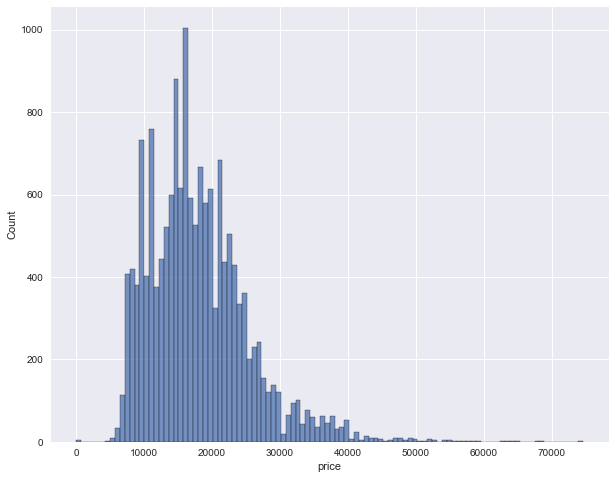

In [193]:
plt.figure(figsize=(10,8))
sns.histplot(data.price);


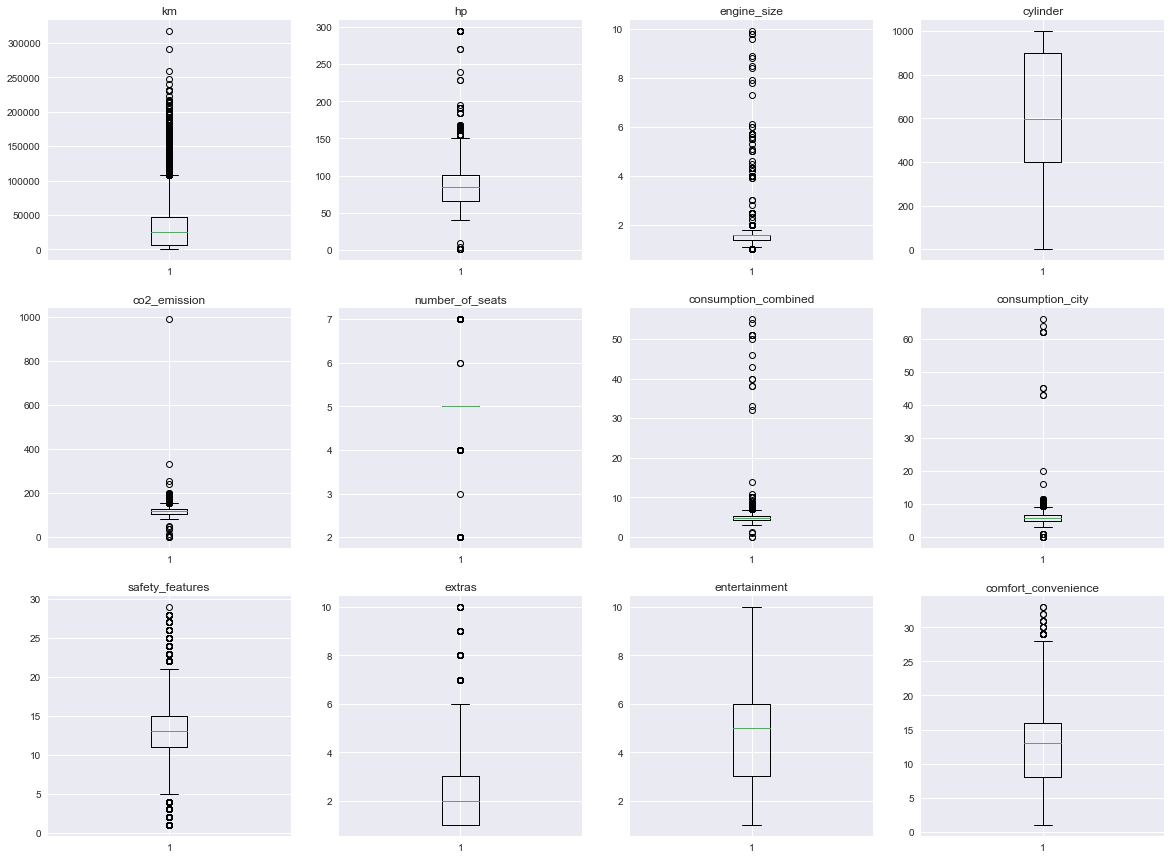

In [174]:
plt.style.use("seaborn")
fig,ax=plt.subplots(3,4,figsize=(20,15))

ax=ax.ravel()
for i in range(len(numeric_data)):
    ax[i].boxplot(data[numeric_data[i]])
    ax[i].set_title(numeric_data[i])